# **Waste Material Segregation for Improving Waste Management**

## **Objective**

The objective of this project is to implement an effective waste material segregation system using convolutional neural networks (CNNs) that categorises waste into distinct groups. This process enhances recycling efficiency, minimises environmental pollution, and promotes sustainable waste management practices.

The key goals are:

* Accurately classify waste materials into categories like cardboard, glass, paper, and plastic.
* Improve waste segregation efficiency to support recycling and reduce landfill waste.
* Understand the properties of different waste materials to optimise sorting methods for sustainability.

## **Data Understanding**

The Dataset consists of images of some common waste materials.

1. Food Waste
2. Metal
3. Paper
4. Plastic
5. Other
6. Cardboard
7. Glass


**Data Description**

* The dataset consists of multiple folders, each representing a specific class, such as `Cardboard`, `Food_Waste`, and `Metal`.
* Within each folder, there are images of objects that belong to that category.
* However, these items are not further subcategorised. <br> For instance, the `Food_Waste` folder may contain images of items like coffee grounds, teabags, and fruit peels, without explicitly stating that they are actually coffee grounds or teabags.

## **1. Load the data**

Load and unzip the dataset zip file.

**Import Necessary Libraries**

In [ ]:

# Install the TensorFlow library
%pip install tensorflow

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



You should consider upgrading via the 'c:\Program Files\Python310\python.exe -m pip install --upgrade pip' command.


In [ ]:
# Install the OpenCV library for image processing
%pip install opencv-python


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



You should consider upgrading via the 'c:\Program Files\Python310\python.exe -m pip install --upgrade pip' command.


In [ ]:
# Import the TensorFlow library
import tensorflow as tf

# Print the TensorFlow version
print(tf.__version__)

2.19.0


In [ ]:
# Import the TensorFlow library
import tensorflow as tf

# Print the TensorFlow version
print("TensorFlow version:", tf.__version__)

# Check if a GPU is available and print the list of GPUs
print("GPU available:", tf.config.list_physical_devices('GPU'))

# Optional: Print all detected devices (both CPU and GPU)
for device in tf.config.list_physical_devices():
    print(device)

TensorFlow version: 2.19.0
GPU available: []
PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')


In [85]:
# Recommended versions:

# numpy version: 1.26.4
# pandas version: 2.2.2
# seaborn version: 0.13.2
# matplotlib version: 3.10.0
# PIL version: 11.1.0
# tensorflow version: 2.18.0
# keras version: 3.8.0
# sklearn version: 1.6.1

In [ ]:
# Import essential libraries

# Import essential libraries for numerical computations and data manipulation
import numpy as np
import pandas as pd

# Import libraries for data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Import libraries for image processing
import PIL
from PIL import Image
import cv2

# Import libraries for file and directory handling
import os
from pathlib import Path
import zipfile

# Import TensorFlow and Keras for deep learning
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# Import scikit-learn for machine learning utilities
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder



Load the dataset.

In [ ]:
# Load and unzip the dataset from local machine



# Get the current working directory
working_directory = os.getcwd()
print("working_directory is >> " + working_directory)

# Define the path to the zip file and the directory where it will be extracted
zip_file_path = 'data.zip'  # Path to the dataset zip file
extract_dir = 'data'  # Directory where the dataset will be extracted

# Extract the contents of the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# Print confirmation of extraction
print("Data extracted to:", extract_dir)

# Set the path to the extracted data directory
PATH = os.path.join(extract_dir, 'data')  # Path to the extracted dataset
print("PATH is >> " + PATH)

working_directory is >> c:\KP_Temp_CDRIVE\Upgrad\Case Studies\Waste Segregation Using CNNs


Data extracted to: data
PATH is >> data\data


In [ ]:
# Initialize an empty list to store category names
categories = []

# Iterate over the entries in the 'data' folder
for entry in os.listdir(PATH):
    # Construct the full path of the entry
    full_path = os.path.join(PATH, entry)
    # Check if the entry is a directory
    if os.path.isdir(full_path):
        # Add the directory name to the categories list
        categories.append(entry)

# Print the list of subfolder names (categories)
print(categories)


['Cardboard', 'Food_Waste', 'Glass', 'Metal', 'Other', 'Paper', 'Plastic']


## **2. Data Preparation** <font color=red> [25 marks] </font><br>


### **2.1 Load and Preprocess Images** <font color=red> [8 marks] </font><br>

Let us create a function to load the images first. We can then directly use this function while loading images of the different categories to load and crop them in a single step.

#### **2.1.1** <font color=red> [3 marks] </font><br>
Create a function to load the images.

In [ ]:
# Create a function to load the raw images

# Function to load images from the dataset
def load_images_from_folder(folder_path, categories):
    # Initialize empty lists to store image data and corresponding labels
    data = []
    labels = []
    
    # Iterate through each category in the dataset
    for category in categories:
        # Construct the path to the category folder
        category_path = os.path.join(folder_path, category)
        
        # Check if the category folder exists
        if not os.path.exists(category_path):
            print(f"Directory {category_path} does not exist.")
            continue
        
        # Iterate through each image in the category folder
        for img_name in os.listdir(category_path):
            # Construct the full path to the image
            img_path = os.path.join(category_path, img_name)
            
            # Read the image using OpenCV
            img = cv2.imread(img_path)
            
            # Check if the image was successfully loaded
            if img is not None:
                # Append the image data to the data list
                data.append(img)
                
                # Append the category label to the labels list
                labels.append(category)
    
    # Return the loaded image data and corresponding labels
    return data, labels






#### **2.1.2** <font color=red> [5 marks] </font><br>
Load images and labels.

Load the images from the dataset directory. Labels of images are present in the subdirectories.

Verify if the images and labels are loaded correctly.

In [ ]:
# Get the images and their labels

# Load the dataset using the previously defined function
images, labels = load_images_from_folder(PATH, categories)

# Verify if the images and labels are loaded correctly
print(f"Number of images loaded: {len(images)}")  # Print the total number of images loaded
print(f"Number of labels loaded: {len(labels)}")  # Print the total number of labels loaded
print(f"Sample labels: {labels[:10]}")  # Display the first 10 labels as a sample

# Check if the number of images matches the number of labels
if len(images) == len(labels):
    print("Images and labels are loaded correctly.")  # Confirm successful loading
else:
    print("Mismatch between number of images and labels.")  # Warn about a mismatch


Number of images loaded: 7625
Number of labels loaded: 7625
Sample labels: ['Cardboard', 'Cardboard', 'Cardboard', 'Cardboard', 'Cardboard', 'Cardboard', 'Cardboard', 'Cardboard', 'Cardboard', 'Cardboard']
Images and labels are loaded correctly.


Perform any operations, if needed, on the images and labels to get them into the desired format.

### **2.2 Data Visualisation** <font color=red> [9 marks] </font><br>

#### **2.2.1** <font color=red> [3 marks] </font><br>
Create a bar plot to display the class distribution

Shape of the dataset: 7625
Data Distribution: {'Cardboard': 540, 'Food_Waste': 1000, 'Glass': 750, 'Metal': 1000, 'Other': 1010, 'Paper': 1030, 'Plastic': 2295}


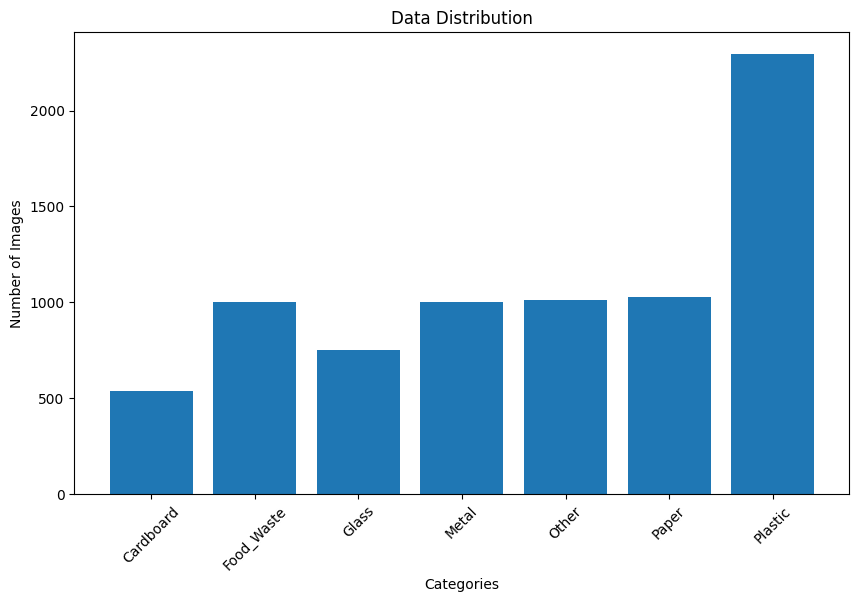

In [ ]:
# Visualise Data Distribution

# Combine images and labels into a single dataset
data = list(zip(images, labels))

# Print the shape of the dataset (number of image-label pairs)
print(f"Shape of the dataset: {len(data)}")

# Function to check data distribution across categories
def check_data_distribution(data, categories):
    # Initialize a dictionary to store the count of images for each category
    distribution = {category: 0 for category in categories}
    # Iterate through the dataset and count the occurrences of each label
    for _, label in data:
        distribution[label] += 1
    return distribution

# Check the data distribution across categories
distribution = check_data_distribution(data, categories)

# Print the data distribution for each category
print("Data Distribution:", distribution)

# Visualize the data distribution using a bar plot
plt.figure(figsize=(10, 6))  # Set the figure size
plt.bar(distribution.keys(), distribution.values())  # Create a bar plot
plt.xlabel('Categories')  # Label for the x-axis
plt.ylabel('Number of Images')  # Label for the y-axis
plt.title('Data Distribution')  # Title of the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()  # Display the plot


#### **2.2.2** <font color=red> [3 marks] </font><br>
Visualise some sample images

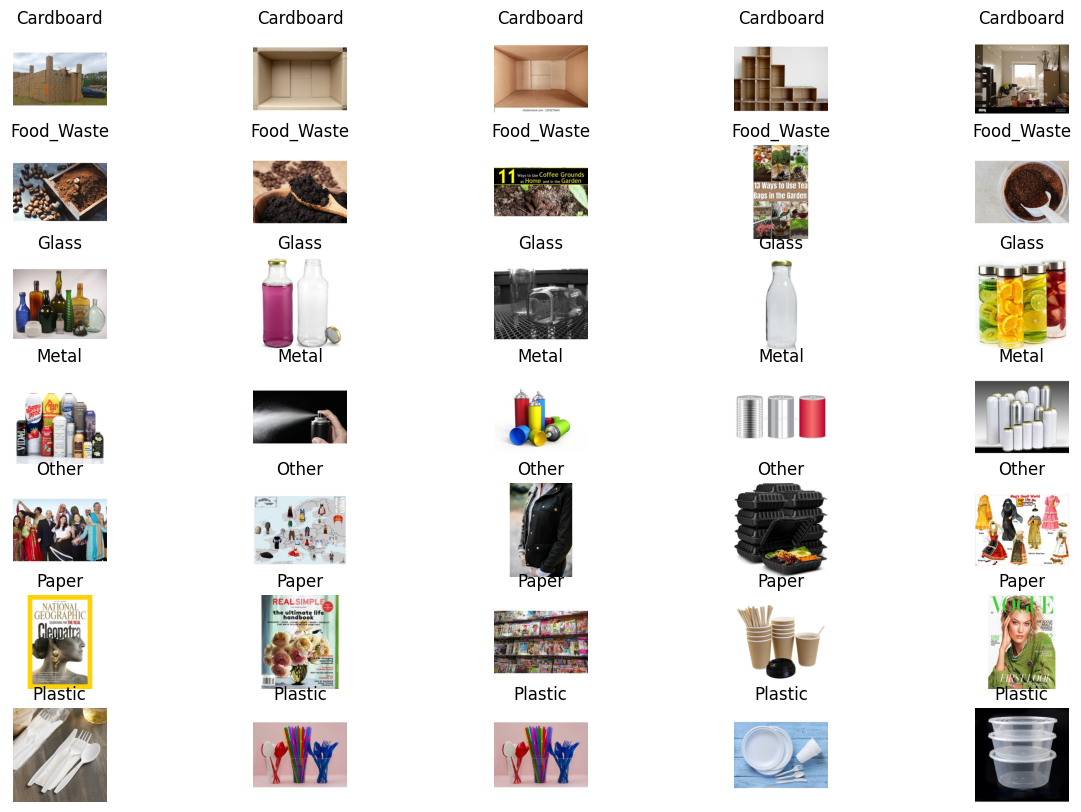

In [ ]:
# Visualise Sample Images (across different labels)

# Function to visualize a few samples from each category
def visualize_samples(data, categories, samples_per_category=5):
    # Set the figure size for the plot
    plt.figure(figsize=(15, 10))
    
    # Loop through each category
    for i, category in enumerate(categories):
        # Filter images belonging to the current category
        category_images = [img for img, label in data if label == category]
        
        # Loop through the specified number of samples per category
        for j in range(samples_per_category):
            # Create a subplot for each image
            plt.subplot(len(categories), samples_per_category, i * samples_per_category + j + 1)
            
            # Convert the image from BGR to RGB format for correct color display
            plt.imshow(cv2.cvtColor(category_images[j], cv2.COLOR_BGR2RGB))
            
            # Set the title of the subplot to the category name
            plt.title(category)
            
            # Remove axis for better visualization
            plt.axis('off')
    
    # Display the plot
    plt.show()

# Visualize a few samples from each category
visualize_samples(data, categories, samples_per_category=5)

#### **2.2.3** <font color=red> [3 marks] </font><br>
Based on the smallest and largest image dimensions, resize the images.

In [ ]:
# Find the smallest and largest image dimensions from the data set
def find_image_dimensions(images):
    # Initialize variables to store the minimum and maximum dimensions
    min_height, min_width = float('inf'), float('inf')  # Set initial minimum dimensions to infinity
    max_height, max_width = 0, 0  # Set initial maximum dimensions to 0

    # Iterate through each image in the dataset
    for img in images:
        # Get the height and width of the current image
        height, width, _ = img.shape
        
        # Update the minimum dimensions if the current image is smaller
        min_height = min(min_height, height)
        min_width = min(min_width, width)
        
        # Update the maximum dimensions if the current image is larger
        max_height = max(max_height, height)
        max_width = max(max_width, width)

    # Return the smallest and largest dimensions as tuples
    return (min_height, min_width), (max_height, max_width)

# Get the smallest and largest dimensions of the images
smallest_dimensions, largest_dimensions = find_image_dimensions(images)

# Print the smallest and largest dimensions
print(f"Smallest dimensions: {smallest_dimensions}")
print(f"Largest dimensions: {largest_dimensions}")


Smallest dimensions: (256, 256)
Largest dimensions: (256, 256)


In [ ]:
# Resize the image dimensions

def resize_images(images, size=(128, 128)):
    """
    Function to resize a list of images to the specified dimensions.

    Parameters:
    images (list): List of images to be resized.
    size (tuple): Desired dimensions (width, height) for resizing.

    Returns:
    np.array: Array of resized images.
    """
    resized_images = []  # Initialize an empty list to store resized images
    for img in images:
        # Resize the image to the specified dimensions
        resized_img = cv2.resize(img, size)
        resized_images.append(resized_img)  # Append the resized image to the list
    return np.array(resized_images)  # Convert the list to a numpy array and return

# Resize the images to the desired dimensions (128x128 by default)
resized_images = resize_images(images)

# Verify the shape of the resized images
print(f"Shape of resized images: {resized_images.shape}")

# Check the shape of the first resized image
print(f"Shape of the first resized image: {resized_images[0].shape}")


Shape of resized images: (7625, 128, 128, 3)
Shape of the first resized image: (128, 128, 3)


### **2.3 Encoding the classes** <font color=red> [3 marks] </font><br>

There are seven classes present in the data.

We have extracted the images and their labels, and visualised their distribution. Now, we need to perform encoding on the labels. Encode the labels suitably.

####**2.3.1** <font color=red> [3 marks] </font><br>
Encode the target class labels.

In [ ]:

def encode_labels(labels):
    # Initialize a LabelEncoder instance to encode the labels
    label_encoder = LabelEncoder()
    
    # Fit the label encoder to the labels and transform them into numeric values
    encoded_labels = label_encoder.fit_transform(labels)
    
    # Return the encoded labels and the label encoder instance
    return encoded_labels, label_encoder

# Encode the labels using the defined function
encoded_labels, label_encoder = encode_labels(labels)

# Print the unique labels and their corresponding encoded values
print("Unique labels and their encoded values:")
for label, encoded in zip(label_encoder.classes_, range(len(label_encoder.classes_))):
    print(f"{label}: {encoded}")

# Check and print the shape of the encoded labels
print(f"Shape of encoded labels: {encoded_labels.shape}")

Unique labels and their encoded values:
Cardboard: 0
Food_Waste: 1
Glass: 2
Metal: 3
Other: 4
Paper: 5
Plastic: 6
Shape of encoded labels: (7625,)


### **2.4 Data Splitting** <font color=red> [5 marks] </font><br>

#### **2.4.1** <font color=red> [5 marks] </font><br>
Split the dataset into training and validation sets

In [ ]:
# Assign specified parts of the dataset to train and validation sets
# Split the dataset into training and testing sets
# resized_images: Array of resized images
# encoded_labels: Array of encoded labels
# test_size=0.2: 20% of the data will be used for testing
# random_state=42: Ensures reproducibility of the split
X_train, X_test, y_train, y_test = train_test_split(resized_images, encoded_labels, test_size=0.2, random_state=42)

# Check the shapes of the training and testing sets
# Print the shape of the training set and its corresponding labels
print(f"Shape of training set: {X_train.shape}, Labels: {y_train.shape}")
# Print the shape of the testing set and its corresponding labels
print(f"Shape of testing set: {X_test.shape}, Labels: {y_test.shape}")

Shape of training set: (6100, 128, 128, 3), Labels: (6100,)
Shape of testing set: (1525, 128, 128, 3), Labels: (1525,)


In [102]:
# Check the shape of the first image in the training set
print(f"Shape of the first image in training set: {X_train[0].shape}")
# Check the shape of the first image in the testing set
print(f"Shape of the first image in testing set: {X_test[0].shape}")

Shape of the first image in training set: (128, 128, 3)
Shape of the first image in testing set: (128, 128, 3)


Training set class distribution: [ 418  791  587  804  816  835 1849]
Testing set class distribution: [122 209 163 196 194 195 446]


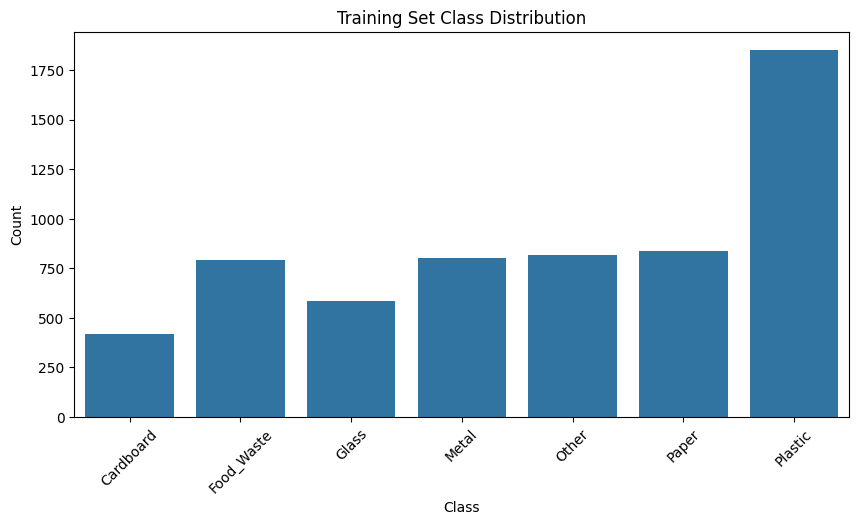

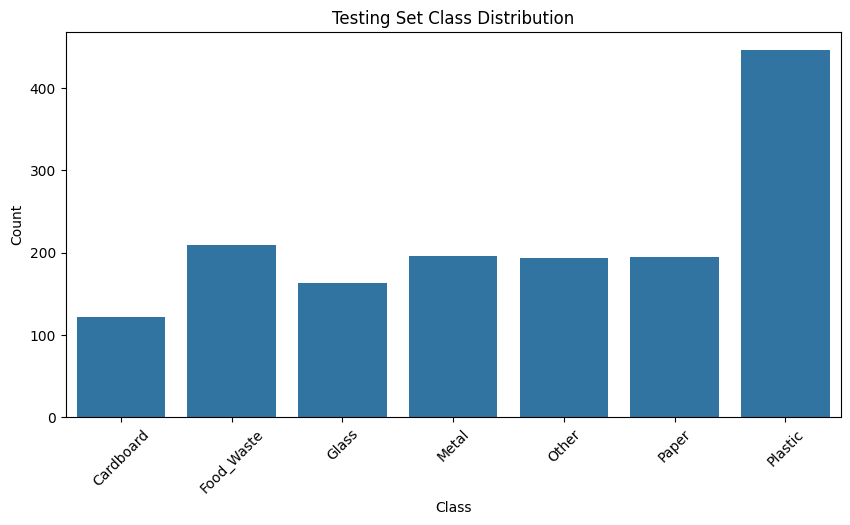

In [ ]:
# Check the distribution of classes in the training and testing sets
# Calculate the distribution of classes in the training set
train_distribution = np.bincount(y_train)

# Calculate the distribution of classes in the testing set
test_distribution = np.bincount(y_test)

# Print the class distribution for the training set
print(f"Training set class distribution: {train_distribution}")

# Print the class distribution for the testing set
print(f"Testing set class distribution: {test_distribution}")

# Import necessary libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Function to plot class distribution
def plot_class_distribution(distribution, title):
    """
    Plots the class distribution as a bar chart.

    Parameters:
    distribution (array-like): Array containing the count of each class.
    title (str): Title of the plot.
    """
    plt.figure(figsize=(10, 5))  # Set the figure size
    sns.barplot(x=np.arange(len(distribution)), y=distribution)  # Create a bar plot
    plt.title(title)  # Set the title of the plot
    plt.xlabel('Class')  # Label for the x-axis
    plt.ylabel('Count')  # Label for the y-axis
    plt.xticks(np.arange(len(distribution)), label_encoder.classes_, rotation=45)  # Set x-axis labels
    plt.show()  # Display the plot

# Plot class distribution for the training set
plot_class_distribution(train_distribution, 'Training Set Class Distribution')

# Plot class distribution for the testing set
plot_class_distribution(test_distribution, 'Testing Set Class Distribution')


## **3. Model Building and Evaluation** <font color=red> [20 marks] </font><br>

### **3.1 Model building and training** <font color=red> [15 marks] </font><br>

#### **3.1.1** <font color=red> [10 marks] </font><br>
Build and compile the model. Use 3 convolutional layers. Add suitable normalisation, dropout, and fully connected layers to the model.

Test out different configurations and report the results in conclusions.

In [ ]:
# Build and compile the model

# Define the CNN model architecture
def create_cnn_model(input_shape, num_classes):
    model = Sequential()
    
    # First convolutional layer with 32 filters, 3x3 kernel size, and ReLU activation
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    # Batch normalization to normalize the activations of the previous layer
    model.add(BatchNormalization())
    # First pooling layer to reduce spatial dimensions
    model.add(MaxPooling2D((2, 2)))
    
    # Second convolutional layer with 64 filters, 3x3 kernel size, and ReLU activation
    model.add(Conv2D(64, (3, 3), activation='relu'))
    # Batch normalization to normalize the activations of the previous layer
    model.add(BatchNormalization())
    # Second pooling layer to further reduce spatial dimensions
    model.add(MaxPooling2D((2, 2)))
    
    # Third convolutional layer with 128 filters, 3x3 kernel size, and ReLU activation
    model.add(Conv2D(128, (3, 3), activation='relu'))
    # Batch normalization to normalize the activations of the previous layer
    model.add(BatchNormalization())
    # Third pooling layer to further reduce spatial dimensions
    model.add(MaxPooling2D((2, 2)))
    
    # Flatten the output from the convolutional layers to feed into fully connected layers
    model.add(Flatten())
    
    # Fully connected layer 1 with 512 neurons and ReLU activation
    model.add(Dense(512, activation='relu'))
    # Batch normalization to normalize the activations of the previous layer
    model.add(BatchNormalization())
    # Dropout layer to prevent overfitting by randomly setting 50% of inputs to zero
    model.add(Dropout(0.5))
    
    # Fully connected layer 2 with 256 neurons and ReLU activation
    model.add(Dense(256, activation='relu'))
    # Batch normalization to normalize the activations of the previous layer
    model.add(BatchNormalization())
    # Dropout layer to prevent overfitting by randomly setting 50% of inputs to zero
    model.add(Dropout(0.5))
    
    # Output layer with softmax activation for multi-class classification
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

# Define the input shape for the images (Height, Width, Channels)
input_shape = (128, 128, 3)

# Define the number of classes based on the label encoder
num_classes = len(label_encoder.classes_)

# Create the CNN model using the defined architecture
cnn_model = create_cnn_model(input_shape, num_classes)

# Print the model summary to visualize the architecture
cnn_model.summary()


C:\Users\kipittam\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 126, 126, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 61, 61, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,075,911 (49.88 MB)

 Trainable params: 13,073,927 (49.87 MB)

 Non-trainable params: 1,984 (7.75 KB)

In [107]:
# Compile the model
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#### **3.1.2** <font color=red> [5 marks] </font><br>
Train the model.

Use appropriate metrics and callbacks as needed.

In [ ]:
# Training

# Define callbacks to improve training
# EarlyStopping: Stops training when validation loss stops improving for 5 consecutive epochs
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

# ModelCheckpoint: Saves the model with the best validation loss during training
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, verbose=1)

# ReduceLROnPlateau: Reduces the learning rate by a factor of 0.5 if validation loss does not improve for 3 epochs
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1)

# Define batch size for training
batch_size = 32

# Train the model
history = cnn_model.fit(
    X_train,  # Training data (images)
    y_train,  # Training labels
    epochs=20,  # Number of epochs to train the model
    batch_size=batch_size,  # Number of samples per batch
    validation_split=0.2,  # Use 20% of the training data for validation
    callbacks=[early_stopping, model_checkpoint, reduce_lr]  # Use defined callbacks during training
)



Epoch 1/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 645ms/step - accuracy: 0.2502 - loss: 2.5837
Epoch 1: val_loss improved from inf to 2.09328, saving model to best_model.h5


153/153 ━━━━━━━━━━━━━━━━━━━━ 110s 688ms/step - accuracy: 0.2504 - loss: 2.5818 - val_accuracy: 0.3098 - val_loss: 2.0933 - learning_rate: 0.0010
Epoch 2/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 652ms/step - accuracy: 0.3731 - loss: 1.8438
Epoch 2: val_loss improved from 2.09328 to 1.60060, saving model to best_model.h5


153/153 ━━━━━━━━━━━━━━━━━━━━ 105s 687ms/step - accuracy: 0.3732 - loss: 1.8435 - val_accuracy: 0.4025 - val_loss: 1.6006 - learning_rate: 0.0010
Epoch 3/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 667ms/step - accuracy: 0.4550 - loss: 1.6016
Epoch 3: val_loss did not improve from 1.60060
153/153 ━━━━━━━━━━━━━━━━━━━━ 109s 713ms/step - accuracy: 0.4551 - loss: 1.6013 - val_accuracy: 0.2074 - val_loss: 2.8375 - learning_rate: 0.0010
Epoch 4/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 654ms/step - accuracy: 0.5018 - loss: 1.3923
Epoch 4: val_loss did not improve from 1.60060
153/153 ━━━━━━━━━━━━━━━━━━━━ 104s 679ms/step - accuracy: 0.5017 - loss: 1.3923 - val_accuracy: 0.4057 - val_loss: 1.6164 - learning_rate: 0.0010
Epoch 5/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 573ms/step - accuracy: 0.5477 - loss: 1.2696
Epoch 5: val_loss did not improve from 1.60060

Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
153/153 ━━━━━━━━━━━━━━━━━━━━ 91s 596ms/step - accuracy: 0.5477 - loss: 1.2695 - val

153/153 ━━━━━━━━━━━━━━━━━━━━ 92s 599ms/step - accuracy: 0.6286 - loss: 1.0525 - val_accuracy: 0.5107 - val_loss: 1.3817 - learning_rate: 5.0000e-04
Epoch 7/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 605ms/step - accuracy: 0.6884 - loss: 0.9019
Epoch 7: val_loss improved from 1.38173 to 1.24347, saving model to best_model.h5


153/153 ━━━━━━━━━━━━━━━━━━━━ 98s 639ms/step - accuracy: 0.6884 - loss: 0.9019 - val_accuracy: 0.5451 - val_loss: 1.2435 - learning_rate: 5.0000e-04
Epoch 8/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 609ms/step - accuracy: 0.7407 - loss: 0.7449
Epoch 8: val_loss did not improve from 1.24347
153/153 ━━━━━━━━━━━━━━━━━━━━ 98s 640ms/step - accuracy: 0.7407 - loss: 0.7449 - val_accuracy: 0.5508 - val_loss: 1.3384 - learning_rate: 5.0000e-04
Epoch 9/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 566ms/step - accuracy: 0.7823 - loss: 0.6374
Epoch 9: val_loss did not improve from 1.24347
153/153 ━━━━━━━━━━━━━━━━━━━━ 91s 590ms/step - accuracy: 0.7822 - loss: 0.6378 - val_accuracy: 0.4066 - val_loss: 2.2200 - learning_rate: 5.0000e-04
Epoch 10/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 583ms/step - accuracy: 0.8088 - loss: 0.5580
Epoch 10: val_loss did not improve from 1.24347

Epoch 10: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
153/153 ━━━━━━━━━━━━━━━━━━━━ 93s 611ms/step - accuracy: 0.8088 - loss: 

153/153 ━━━━━━━━━━━━━━━━━━━━ 95s 617ms/step - accuracy: 0.8737 - loss: 0.3949 - val_accuracy: 0.6082 - val_loss: 1.2351 - learning_rate: 2.5000e-04
Epoch 12/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 577ms/step - accuracy: 0.9078 - loss: 0.2952
Epoch 12: val_loss improved from 1.23505 to 1.14622, saving model to best_model.h5


153/153 ━━━━━━━━━━━━━━━━━━━━ 92s 603ms/step - accuracy: 0.9078 - loss: 0.2953 - val_accuracy: 0.6352 - val_loss: 1.1462 - learning_rate: 2.5000e-04
Epoch 13/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 561ms/step - accuracy: 0.9297 - loss: 0.2362
Epoch 13: val_loss did not improve from 1.14622
153/153 ━━━━━━━━━━━━━━━━━━━━ 89s 582ms/step - accuracy: 0.9297 - loss: 0.2361 - val_accuracy: 0.6369 - val_loss: 1.1656 - learning_rate: 2.5000e-04
Epoch 14/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 564ms/step - accuracy: 0.9598 - loss: 0.1682
Epoch 14: val_loss did not improve from 1.14622
153/153 ━━━━━━━━━━━━━━━━━━━━ 91s 596ms/step - accuracy: 0.9598 - loss: 0.1683 - val_accuracy: 0.6393 - val_loss: 1.2072 - learning_rate: 2.5000e-04
Epoch 15/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 637ms/step - accuracy: 0.9605 - loss: 0.1413
Epoch 15: val_loss did not improve from 1.14622

Epoch 15: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
153/153 ━━━━━━━━━━━━━━━━━━━━ 102s 662ms/step - accuracy: 0.9605 - l

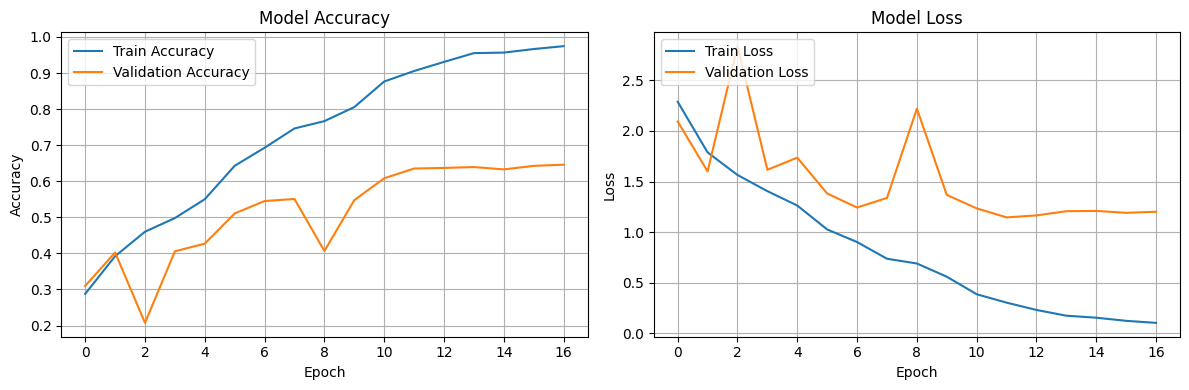

In [110]:
# Function to visualize the training history
def plot_training_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')
    plt.grid()

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')
    plt.grid()

    plt.tight_layout()
    plt.show()
# Visualize the training history
plot_training_history(history)


### **3.2 Model Testing and Evaluation** <font color=red> [5 marks] </font><br>

#### **3.2.1** <font color=red> [5 marks] </font><br>
Evaluate the model on test dataset. Derive appropriate metrics.

In [ ]:
# Evaluate the model on the test dataset
# This will calculate the loss and accuracy of the model on the unseen test data
test_loss, test_accuracy = cnn_model.evaluate(X_test, y_test)

# Print the test loss to understand how well the model generalizes
print(f"Test Loss: {test_loss}")

# Print the test accuracy to measure the model's performance on the test set
print(f"Test Accuracy: {test_accuracy}")


48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - accuracy: 0.6797 - loss: 1.0099
Test Loss: 1.091676115989685
Test Accuracy: 0.6537705063819885


In [113]:
# Generate predictions on the test dataset
predictions = cnn_model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)

# Generate a classification report
#report = classification_report(np.argmax(y_test, axis=1), predicted_labels, target_names=label_encoder.classes_)
report = classification_report(y_test, predicted_labels, target_names=label_encoder.classes_)
print("Classification Report:")
print(report)

48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 106ms/step
Classification Report:
              precision    recall  f1-score   support

   Cardboard       0.85      0.66      0.75       122
  Food_Waste       0.77      0.67      0.72       209
       Glass       0.61      0.56      0.58       163
       Metal       0.67      0.64      0.65       196
       Other       0.57      0.47      0.51       194
       Paper       0.70      0.53      0.60       195
     Plastic       0.61      0.82      0.70       446

    accuracy                           0.65      1525
   macro avg       0.68      0.62      0.64      1525
weighted avg       0.66      0.65      0.65      1525



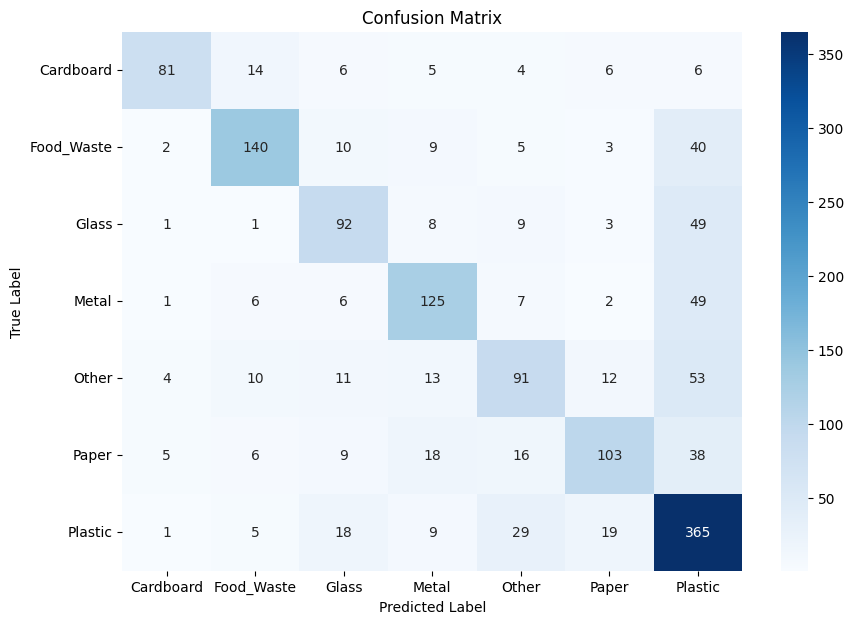

In [ ]:
# Generate a confusion matrix
# Generate the confusion matrix using the true and predicted labels
cm = confusion_matrix(y_test, predicted_labels)


# Define a function to plot the confusion matrix
def plot_confusion_matrix(cm, classes):
    """
    Plots the confusion matrix as a heatmap.

    Parameters:
    cm (array-like): Confusion matrix to be plotted.
    classes (list): List of class names corresponding to the labels.
    """
    # Set the figure size for the plot
    plt.figure(figsize=(10, 7))
    
    # Create a heatmap of the confusion matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    
    # Add a title to the plot
    plt.title('Confusion Matrix')
    
    # Label the x-axis as 'Predicted Label'
    plt.xlabel('Predicted Label')
    
    # Label the y-axis as 'True Label'
    plt.ylabel('True Label')
    
    # Display the plot
    plt.show()

# Call the function to plot the confusion matrix
plot_confusion_matrix(cm, label_encoder.classes_)

## **4. Data Augmentation** <font color=red> [optional] </font><br>

#### **4.1 Create a Data Augmentation Pipeline**

##### **4.1.1**
Define augmentation steps for the datasets.

In [115]:


# Define the augmentation steps


Augment and resample the images.
In case of class imbalance, you can also perform adequate undersampling on the majority class and augment those images to ensure consistency in the input datasets for both classes.

Augment the images.

In [116]:
# Create a function to augment the images




In [117]:
# Function to augment images



In [118]:
# Create the augmented training dataset



##### **4.1.2**

Train the model on the new augmented dataset.

In [119]:
# Train the model using augmented images



## **5. Conclusions** <font color = red> [5 marks]</font>

#### **5.1 Conclude with outcomes and insights gained** <font color =red> [5 marks] </font>

* Report your findings about the data
* Report model training results

In [ ]:
# Calculate accuracy
# Import the accuracy_score function from sklearn.metrics
from sklearn.metrics import accuracy_score

# Calculate the accuracy score using the true and predicted labels
accuracy = accuracy_score(y_test, predicted_labels)

# Print the accuracy as a percentage with two decimal places
print(f"Accuracy: {accuracy * 100:.2f}%")

# Calculate precision, recall, and F1-score
# Import precision_score, recall_score, and f1_score functions from sklearn.metrics
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate the precision score (weighted average for multi-class classification)
precision = precision_score(y_test, predicted_labels, average='weighted')

# Calculate the recall score (weighted average for multi-class classification)
recall = recall_score(y_test, predicted_labels, average='weighted')

# Calculate the F1-score (weighted average for multi-class classification)
f1 = f1_score(y_test, predicted_labels, average='weighted')

# Print the precision, recall, and F1-score as percentages with two decimal places
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1-Score: {f1 * 100:.2f}%")


Accuracy: 65.38%
Precision: 66.30%
Recall: 65.38%
F1-Score: 65.03%


#### Data Insights

- The given dataset has various categories - ['Cardboard' 'Food_Waste' 'Glass' 'Metal' 'Other' 'Paper' 'Plastic'] that contains images in .PNG format.
- The given dataset is imabalnced as 'Plastic' categorie has highest number of images whereas the lowest recorded in "Cardboard' folder.
- This imbalance in the dataset will affect model performance unless you treat them with other techniques like data augumentation.
- The given categories are encoded into numeric values to process in model.



#### Model training logic

- Model specifications
    - Contains 3 Convolutional layers with activation - relu
    - The above layer is followed by the repspective batch normalization and max-pooling layers
    - Fully connected layers were used for classification while softmax activation for multi-class classification.

- Training Specifications
    - Used ADAM optimizer and Categorical cross-Entropy loss.
    - To prvent overfitting, Early Stopping, model checkpointing and learning rate reduction callbacks were used.


#### Performance Metrics


- Accuary  :  ~ 65% on Test set
- Precision:  ~ 66%
- Recall   :  ~ 65%
- F1 Score :  ~ 65%
- Classification Matrix : As per the classification chat, "Card board" and "Food Waste" are classified more accurately in this model.
- Confusion Matrix : As per the Confusion matrix, "Card board" and "Plastic" are classified more accurately in this model.


## Conclusion

1. **Data-related Improvements**
   - Implement data augmentation to address class imbalance
   - Collect more samples for underrepresented classes 
   - Include more diverse images within each category

2. **Model Enhancements**
   - Experiment with deeper architectures or pre-trained models
   - Implement class weights to handle imbalanced data
   - Try different optimization strategies and hyperparameters

3. **Practical Applications**
   - Could be integrated into automated waste sorting systems
   - Potential for mobile applications for consumer waste sorting
   - Useful for recycling facilities and waste management education

This demonstrates the potential of CNN-based approaches for waste segregation while highlighting areas for future improvement in both data collection and model architecture.

## References Used:
1. Upgrads Content & Started Notebook
2. [Image Preprocessing in TensorFlow](https://www.tensorflow.org/tutorials/load_data/images)
3. [Build TensorFlow input pipelines](https://www.tensorflow.org/guide/data)
4. [Understanding One-Hot Encoding](https://towardsdatascience.com/understanding-one-hot-encoding-and-its-importance-in-machine-learning-cf8fb0ab73b4)
5. [Building a CNN in Keras](https://www.tensorflow.org/tutorials/images/cnn)
6. [Evaluating Classification Models](https://machinelearningmastery.com/classification-accuracy-is-not-enough-more-performance-measures-you-can-use/)